In [1]:
# Import necessary libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a pandas dataframe
data = pd.read_csv('CR_DataN.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop,Diseases
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,"{'bacterial blast', 'rice blast', 'sheath blig..."
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,"{'bacterial blast', 'rice blast', 'sheath blig..."
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,"{'bacterial blast', 'rice blast', 'sheath blig..."
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,"{'bacterial blast', 'rice blast', 'sheath blig..."
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,"{'bacterial blast', 'rice blast', 'sheath blig..."


In [4]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,Crop,Diseases
6595,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,"{'berry blotch', 'brown eye spot disease', 'bl..."
6596,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,"{'berry blotch', 'brown eye spot disease', 'bl..."
6597,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,"{'berry blotch', 'brown eye spot disease', 'bl..."
6598,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,"{'berry blotch', 'brown eye spot disease', 'bl..."
6599,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,"{'berry blotch', 'brown eye spot disease', 'bl..."


In [5]:
data.size

59400

In [6]:
data.shape

(6600, 9)

In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
Diseases       0
dtype: int64

In [8]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop',
       'Diseases'],
      dtype='object')

In [9]:
data['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
data['Diseases'].unique()

array(["{'bacterial blast', 'rice blast', 'sheath blight'}",
       "{'rusts', 'seedling blight', 'downy mildew'}",
       "{'botrytis grey mould', 'ascochyta blight', 'sclerotinia rot'}",
       "{'halo blight', 'brown spot', 'common blight'}",
       "{'botrytis grey mold', 'phytophthora blight', 'fusarium wilt'}",
       "{'ashy stem blight', 'fusarium wilt', 'charcoal rot'}",
       "{'halo blight', 'anthracnose', 'yellow mosaic'}",
       "{'cercospora leaf spot', 'rust', 'powdery mildew'}",
       "{'Pea mosaic virus', 'ascochyta blight', 'anthracnose'}",
       "{'fusarium wilt', 'leaf and fruit spot', 'anthracnose'}",
       "{'panama wilt', 'banana bract mosaic virus(bbmv)', 'bunchy top'}",
       "{'mango malformation', 'red rust', 'phoma blight'}",
       "{'mites', 'grey mold', 'downy mildew', 'black rot'}",
       "{'bacterial fruit blotch', 'downy mildew', 'anthracnose'}",
       "{'phytophthora blight', 'fusarium wilt', 'phytophthora crown'}",
       "{'apple scab', 'bla

In [11]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
Crop            object
Diseases        object
dtype: object

In [12]:
data['Crop'].value_counts()

rice           300
maize          300
jute           300
cotton         300
coconut        300
papaya         300
orange         300
apple          300
muskmelon      300
watermelon     300
grapes         300
mango          300
banana         300
pomegranate    300
lentil         300
blackgram      300
mungbean       300
mothbeans      300
pigeonpeas     300
kidneybeans    300
chickpea       300
coffee         300
Name: Crop, dtype: int64

<AxesSubplot:>

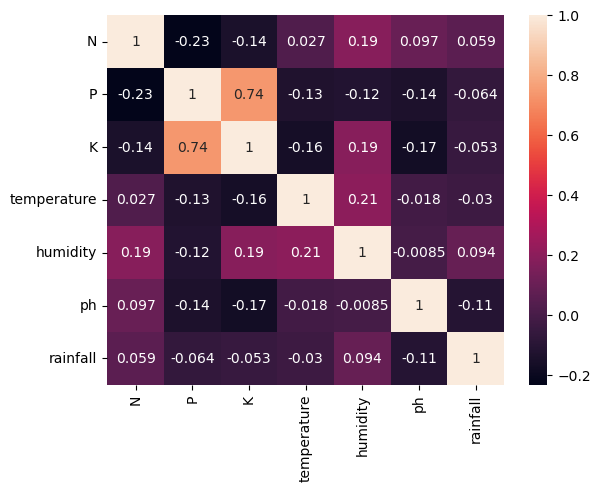

In [13]:
sns.heatmap(data.corr(),annot=True)

# Exploratory Data Analysis

[]

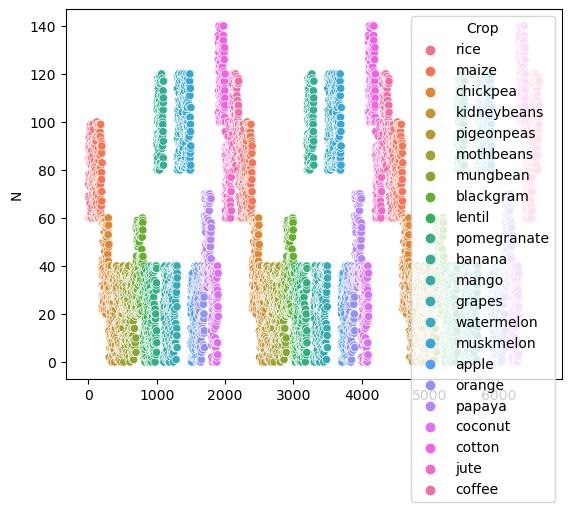

In [14]:
sns.scatterplot(x=data.index, y=data['N'], hue=data['Crop'])
plt.plot()

[]

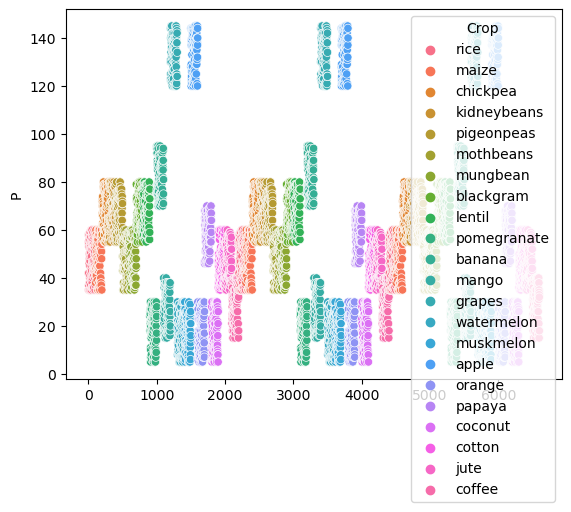

In [15]:
sns.scatterplot(x=data.index, y=data['P'], hue=data['Crop'])
plt.plot()

[]

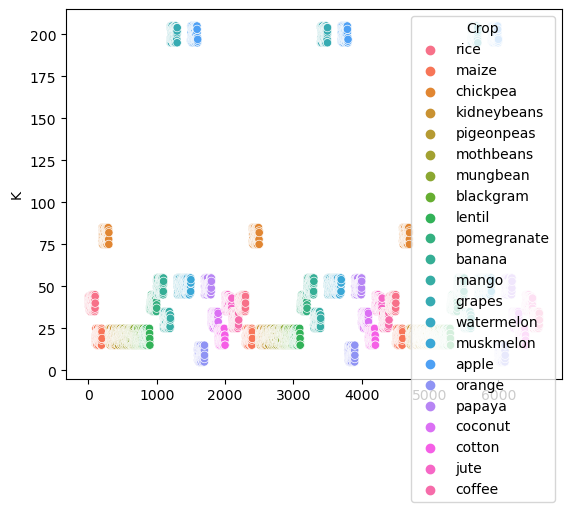

In [16]:
sns.scatterplot(x=data.index, y=data['K'], hue=data['Crop'])
plt.plot()

[]

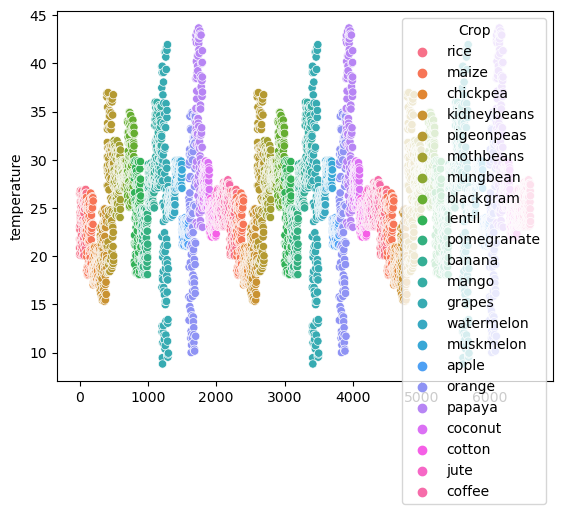

In [17]:
sns.scatterplot(x=data.index, y=data['temperature'], hue=data['Crop'])
plt.plot()

[]

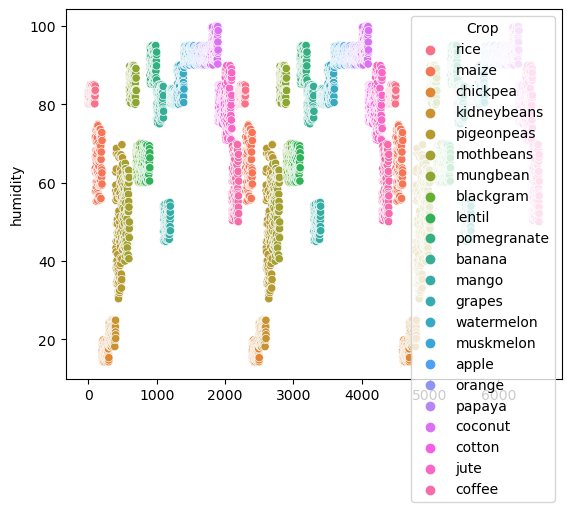

In [18]:
sns.scatterplot(x=data.index, y=data['humidity'], hue=data['Crop'])
plt.plot()

[]

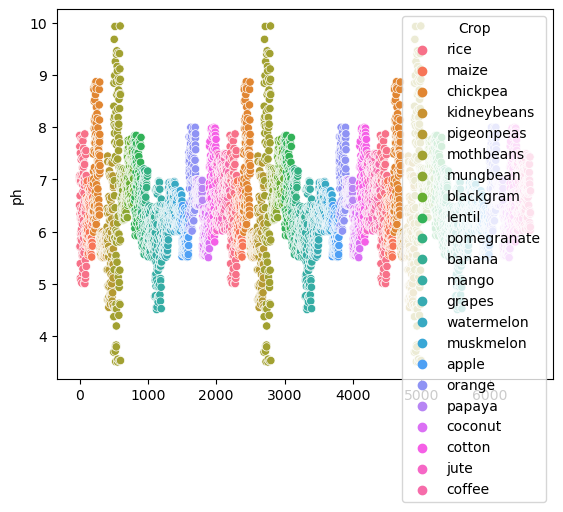

In [19]:
sns.scatterplot(x=data.index, y=data['ph'], hue=data['Crop'])
plt.plot()

[]

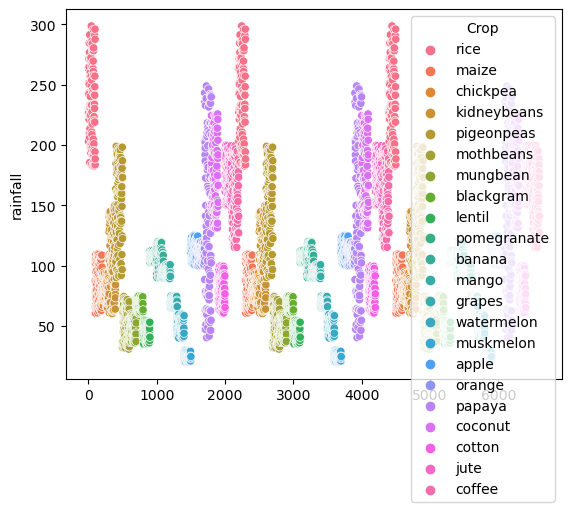

In [20]:
sns.scatterplot(x=data.index, y=data['rainfall'], hue=data['Crop'])
plt.plot()

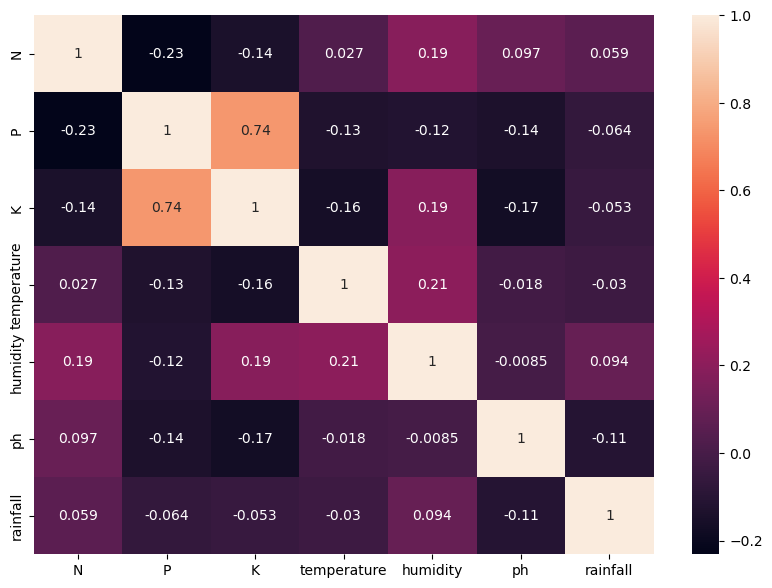

In [21]:
#Correlation Matrix
corrMatrix = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [22]:
# Preprocess the data by separating the input features (X) and output labels (y)
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data[['Crop', 'Diseases']]

In [23]:
# Create a MultiLabelBinarizer object and fit it to the target data
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y.values)

In [24]:
 #Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create an MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)


In [26]:
# Train the classifier on the entire dataset
#clf.fit(X, y)

In [27]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)

In [28]:
# Take input values from the user
N = float(input("Enter the value of N: "))
P = float(input("Enter the value of P: "))
K = float(input("Enter the value of K: "))
temperature = float(input("Enter the temperature in Celsius: "))
humidity = float(input("Enter the humidity in percentage: "))
pH = float(input("Enter the pH value: "))
rainfall = float(input("Enter the rainfall in mm: "))

Enter the value of N: 23
Enter the value of P: 69
Enter the value of K: 17
Enter the temperature in Celsius: 23.9
Enter the humidity in percentage: 63.8
Enter the pH value: 6.5
Enter the rainfall in mm: 44.7


In [29]:
# Create a numpy array with the input parameters
input_data = np.array([[N, P, K, temperature, humidity, pH, rainfall]])

In [30]:
# Predict the crop and disease using the trained MLP classifier
output_data = clf.predict(input_data)

In [31]:
# Convert the predicted output to the original format using the MultiLabelBinarizer object
output_data = mlb.inverse_transform(output_data)

In [32]:
# Print the recommended crop and possible diseases
print('Recommended Crop:', output_data[0][0])
print('Possible Diseases:', output_data[0][1])

Recommended Crop: lentil
Possible Diseases: {'Pea mosaic virus', 'ascochyta blight', 'anthracnose'}


In [33]:
# Calculate the accuracy of the MLP regressor
accuracy = clf.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9643939393939394


In [34]:
# Import the time module
import time

In [35]:
# Measure the time it takes to fit the classifier on the training data
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
fit_time = end_time - start_time
print("Time to fit the classifier on the training data: ", fit_time)

Time to fit the classifier on the training data:  28.46395516395569


In [36]:
# Measure the time it takes to make a prediction on the test data
start_time = time.time()
clf.predict(X_test)
end_time = time.time()
predict_time = end_time - start_time
print("Time to make a prediction on the test data: ", predict_time)

Time to make a prediction on the test data:  0.0


In [39]:
import pickle
pickle.dump(clf,open('C:/Users/yahav/OneDrive/Desktop/CRDP App/models/model.pkl','wb'))
